In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
%matplotlib inline

In [120]:
fs = 1000
t = np.arange(0, 5, 1/fs)

signal = np.sin(2*np.pi*50*t) + 2*np.sin(2*np.pi*44*t)  + 0.5*np.sin(2*np.pi*57*t) 

In [121]:
sig_len = len(signal)
frq = np.linspace(0, fs, sig_len)
frq = frq[:sig_len//2]
len(frq), frq

psd = abs(np.fft.fft(signal)[:sig_len//2])*(2/sig_len)

(40, 60)

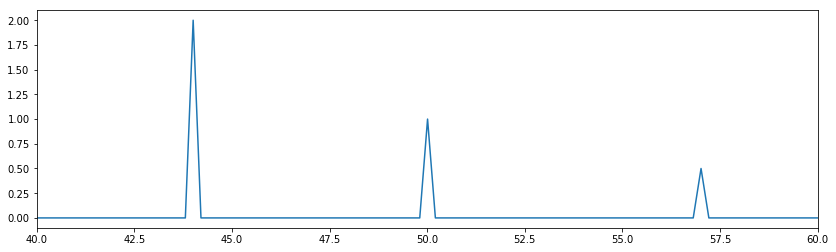

In [122]:
fig, ax = plt.subplots(1, figsize=(14, 4))
ax.plot(frq, psd)
ax.set_xlim(40, 60)